# 25-1. 들어가며


### 학습 목표
---
- 컴퓨터 비전 분야에서 핫한 키워드인 ViT 와 Diffusion model 에 대해 알아봅니다
- 각 모델의 구조를 학습하고 장점과 단점에 대해 이해해봅니다

### 학습 내용
---
#### Vision transformer
- Vision Transformer, ViT
- Transformer 의 뛰어난 특성
- Transformer 가 이미지를 구분하기 위해서는?
- ViT 의 성능이 궁금하세요?

#### Stable diffusion
- 이런건 어떻게 만드는거지?
- 멀쩡한 데이터에 노이즈를 섞어 보았는데요?!
- Latent, 그 오묘한 세계로!
- 두둥 그리고 Stable Diffusion!


#### 참고
- explicit : 눈으로 보임, 명시적
- impicit : 의미적인, 내재적

# 25-2. ViT

### 두둥! 이미지를 정복하러온 Transformer
---
> 😎 Image Classification 은 이제 너무 쉬운거 아닌가요?

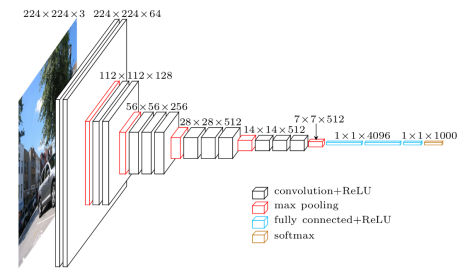



#### Q. 위 그림의 모델 구조 안에서, 입력 데이터를 통해 이미지적 특성을 직접 추출하는 부분과 여러 특성들을 조합하여 분류하는 부분을 구분할 수 있나요?
Feature extractor : 입력부터 7 x 7 x 512 Max pooling 레이어  
Classifier : 1 x 1 x 4096 형태의 FC 레이어 부터 출력 직전까지


기본적인 이미지 분류를 위한 VGG 모델 구조를 표현한 그림이 있습니다.
((Batch,) Height, Width, Channel) 형태의 텐서로 이루어진 이미지가 여러 레이어를 거치며 조금씩 변형되는 모습을 보여주고 있습니다.

모델 후반부의 분류기 구조를 자세하게 살펴보죠.
클래스 분류를 수행하기 직전의 레이어까지, 각 노드의 출력에 해당하는 여러 개의 스칼라 값들이 나열되어있군요.
우리에게 익숙한 밀집 벡터 형태로 변환할 수 있지 않을까? 라는 호기심이 자연스레 머릿속을 스쳐 지나갑니다.


데이터의 밀집 벡터 표현(Dense Vector Representation)을 효율적으로 다룰 수 있는 메커니즘으로 어떤 것을 적용해볼 수 있을까요?

> ✋🤚 둠칫둠칫 ✋🤚 신나는 음악과 함께 출바알-!


### Attention
---
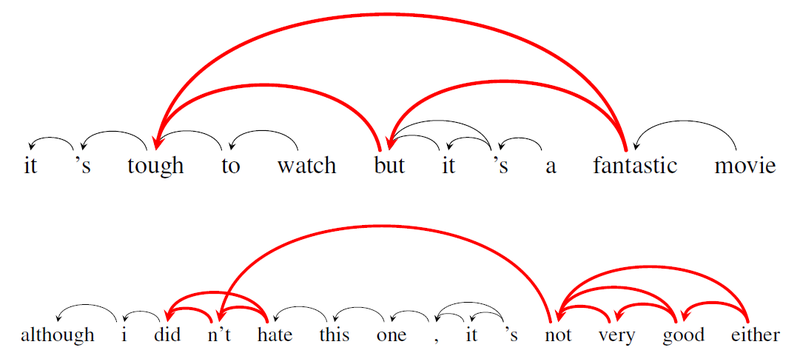
[Self-attention applied to sentiment analysis. Source: Cheng et al. 2016, fig. 5.]  

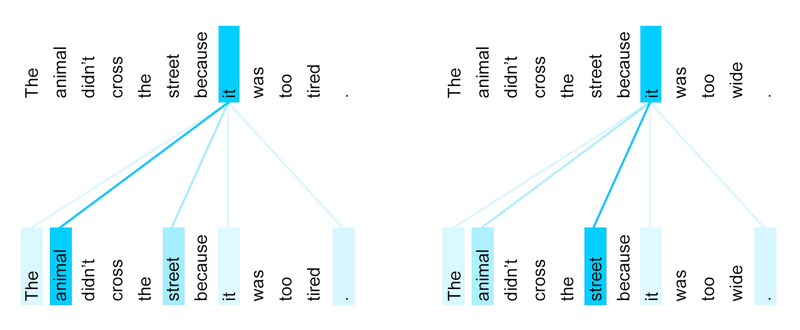
[출처: https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html]  

자연어 처리(Natural Language Processing, NLP) 분야에서는 수많은 시퀀스 형태의 임베딩(밀집 벡터)도 척척 다룰수 있는 어텐션 메커니즘(Attention mechanism)이 이미 급부상하고 있었습니다.

입력 데이터의 길이에 영향을 적게 받고, 사뭇 미묘하고 복잡해보이는 표현들도 세밀하게 구분하는 능력을 보여준 어텐션 메커니즘은 곧 트랜스포머(Transformer)라는 뛰어난 모델로 꽃을 피웁니다. NLP 에서 이미 독보적인 성능을 보여준 트랜스포머는 어쩌면 컴퓨터 비전(Computer Vision, CV)으로 영역을 넓혀 Convolution 기반의 레이어 구조들을 대체하면서 혁신적인 성능을 보일지도 모르겠군요!



# 25-3. ViT(2)

### Transformer 의 뛰어난 특성
---
가장 단순한 Image classification task부터 시작해봅니다.
컴퓨터 비전 분야에서 트랜스포머를 적용하려는 여러 번의 시도는 어찌보면 굉장히 단순한 형태로 시작되었습니다.

트랜스포머가 보여줬던 특출난 장점 중에는 1) 입력처리가 유연하다, 2) 스케일 가능한 아키텍쳐를 가지고 있다, 3) 병렬 처리에 유리하다 등이 있습니다.
아직 트랜스포머에 익숙하지 않으실 분들을 위해, 위 특성들을 구현할 수 있는 구성요소들을 간단하게 살펴볼까요?


#### 1) 입력처리가 유연하다  
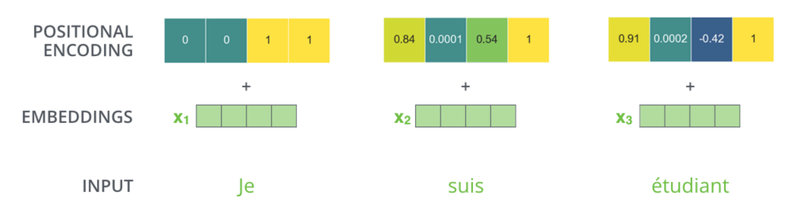  
[출처: https://jalammar.github.io/illustrated-transformer/]  

어텐션을 활용하기 위해서는 입력 데이터에서 단어(텍스트형)들을 Token (숫자형) 으로 인코딩하고, Scalar 형태의 토큰들을 Vector 형태의 Embedding 으로 변환하는 작업을 거칩니다. 이를 통해 의미의 경계가 뚜렷하지 않은 아주 많은 종류의 단어(토큰)들도 상대적으로 적은 차원 형식을 통해 구분하여 활용할 수 있습니다.

트랜스포머를 제안한 논문 에서는, 입력 데이터 시퀀스 안에서 각 단어들의 위치를 서로 구별하기 위하여 단어의 임베딩에 Positional encoding 을 더해줍니다.
https://arxiv.org/abs/1706.03762

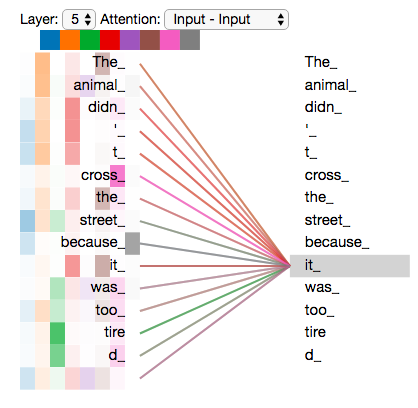  
[출처: https://jalammar.github.io/illustrated-transformer/]  

위 그림은 self-attention을 통해 살펴본 각 단어들의 연관성(attention score)을 시각화한 자료입니다. 입력된 문장 안에 있는 특정 단어와 나머지 단어들 사이의 연관성을 점수화하여 확인하는 과정이라고 볼 수 있습니다.

그림의 왼쪽에 위치한 단어들을 표현한 8 가지 색(임베딩)이 담고있는 의미를 명확하게 구분하는 것은 직관적으로 쉽지않지만, 각 단어의 의미, 형식 위치 등의 정보를 내포하고 있음을 짐작할 수 있습니다.


#### 2) 스케일 가능한 아키텍쳐  
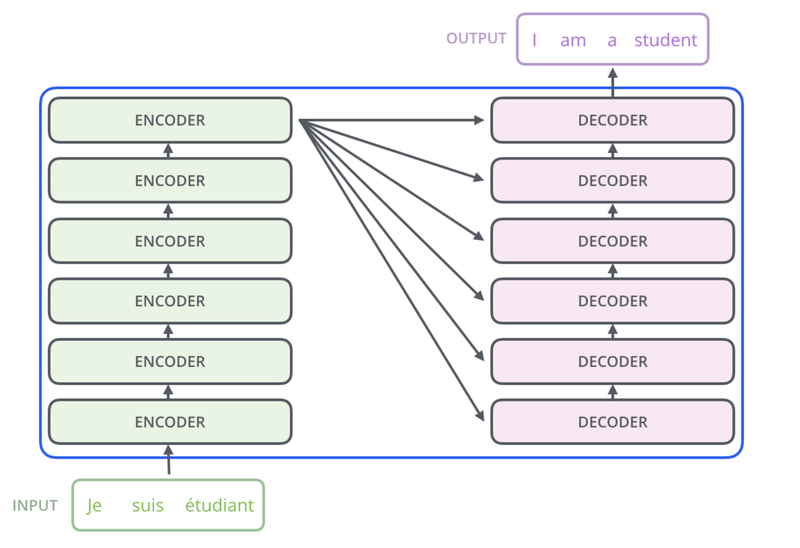  
[출처: https://jalammar.github.io/illustrated-transformer/]  

트랜스포머의 주요 구조는 어텐션 레이어를 조합한 Encoder 와 Decoder 단위 구성체(Unit)로 이루어져있습니다. 이러한 유닛 구조의 장점으로는 몇 개의 유닛을 쌓느냐(stackable)에 따라 모델이 처리할 수 있는 정보의 스케일을 손쉽게 조정할 수 있다는 점이 있습니다.

그림에서 관찰할 수 있듯이, 통상적으로 인코더 역할의 유닛은 입력 데이터로부터 특성들을 추출하여 정제하는 역할을 하고, 디코더 유닛은 인코더에서 나온 정보와 이전 단계의 출력 함께 전달받아, 새로운 결과물을 만들어내는 기능을 한다고 알려져 있습니다.


#### 3) 병렬 처리에 유리하다  
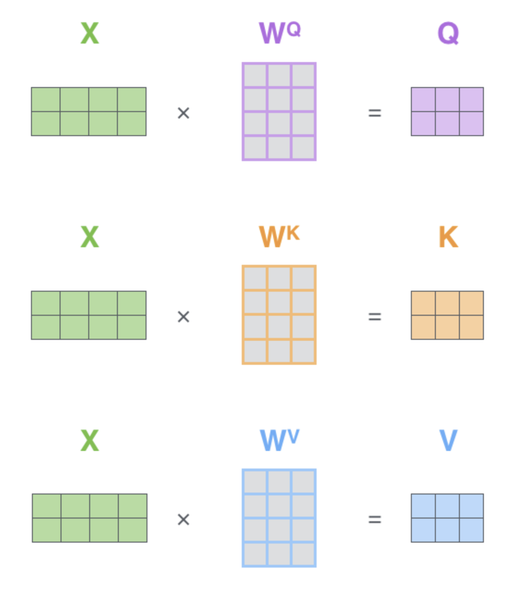  
[출처: https://jalammar.github.io/illustrated-transformer/]  

트랜스포머로 입력된 임베딩은 또 다른 형태의 행렬들로 변환되어 각각 어텐션 계산 과정에 활용됩니다. Self-attention 계산을 위해 필요한 요소로 Key, Query, Value 가 있으며, 각 변환 과정에서는 적절한 크기의 가중치 행렬들이 함께 계산과정에 참여하게 됩니다.

트랜스포머를 이루는 대부분의 요소들이 행렬 형태로 전달되기 때문에, 학습 과정에서 단순한 행렬 연산을 반복하면서 병렬로 연산을 처리하기에 용이하다는 특징을 가지게 됩니다. 이전보다 상대적으로 굉장히 많은 양의 데이터를 효율적으로 학습하게 되었으며, 특히 모델과 데이터 사이에 연결된 내재적인 의미들을 확장하여 인식하는 데 빼어난 성능을 보이고 있습니다.

#### Q. self-attention 과정에 사용되는 query, key, value 행렬이 서로 어떤 연관이 있나요? 간단한 검색해보고 답을 완성해봅시다.
입력된 데이터를 쿼리로 사용하여 키와 얼마나 유사한 지 비교해보고, 키와 연결된 값 value를 반환한다.


더 자세하게 이야기해 볼 내용이 너무도 많지만, CV 분야에서 트랜스포머가 어떻게 활용됐는지 너무 궁금하네요.  
상세한 내용이 궁금하시다면, 추후 느긋하게 시간을 들여 아래 자료들을 살펴보시기를 추천드립니다.  
- Paper - Attention is All You Need, NIPS, 2017 https://arxiv.org/pdf/1706.03762
- Blog - The Illustrated Transformer https://jalammar.github.io/illustrated-transformer/


# 25-4. ViT(3)


### Transformer 가 이미지를 구분하기 위해서는?
---

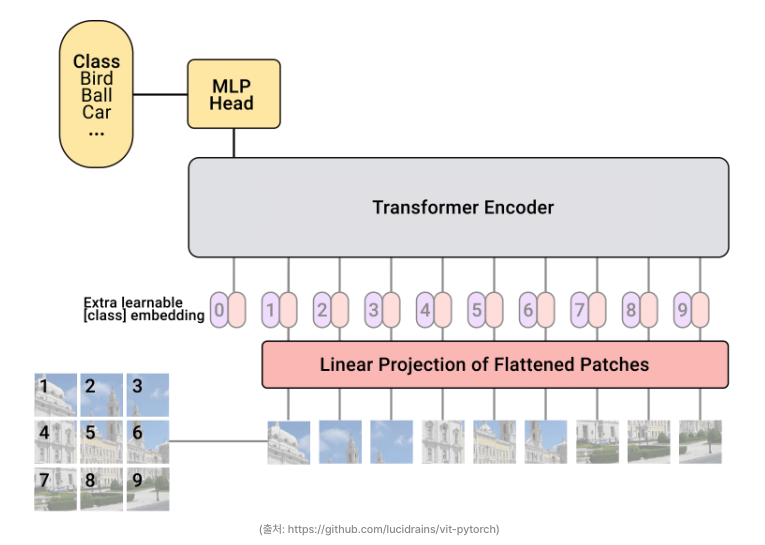  

(출처: https://github.com/lucidrains/vit-pytorch)

이렇게 성능이 뛰어난 트랜스포머에 자연어가 아닌 이미지 형식을 입력하기 위해서는 어떻게 해야할까요?

Vision Transformer , 줄여서 ViT 는 이 과정을 간결하고도 성공적으로 수행해 낸 논문으로 평가됩니다. 특히 트랜스포머의 기존 내부 구조를 거의 변형하지 않고도 이미지 데이터를 입력 받을 수 있었다는 점에서 주된 의의를 갖습니다. https://arxiv.org/abs/2010.11929v2

논문의 그림에서 제시된 구조를 살펴볼 때, 입력된 이미지는 특정한 변환작업을 거쳐 트랜스포머 인코더로 들어갑니다. 입력 데이터에서 패턴을 추출하는 역할의 트랜스포머 인코더 부분을 가져와 ViT 메인 구조로 활용하는 것을 확인할 수 있습니다. 인코더에서 정제되어 나온 출력 중 일부는 간단한 신경망 분류기에 넣어 최종적으로 클래스 분류 작업을 수행하게 됩니다.

이러한 과정을 준비하기 위해서, 기존 트랜스포머에 사용되던 세 가지의 요소를 이미지라는 데이터 특성에 맞추어 변형해야 합니다.

- 텍스트 토큰을 임베딩으로 변환 - Patch
- 클래스 정보를 담은 특수 토큰 - Class Token
- 이미지 형식에 맞는 위치 정보 - Positional Encoding

### 이미지를 Patch 로 잘게 쪼개자!
---
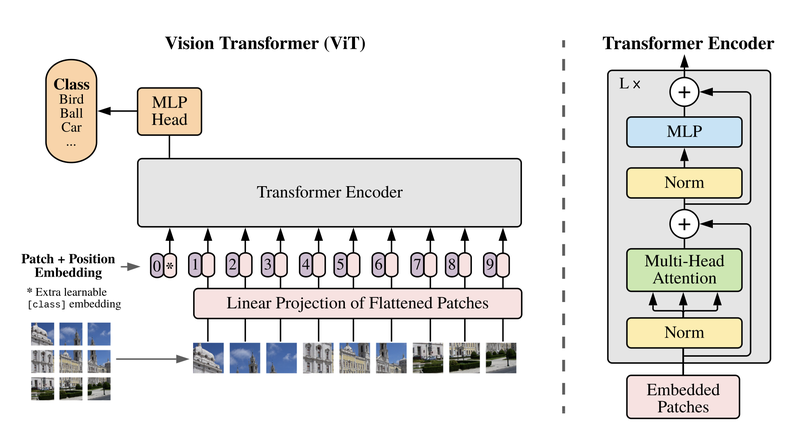  
[출처: https://arxiv.org/abs/2010.11929v2]  

그림의 왼쪽 아래, 모델에 입력된 건물 이미지가 보이네요.

먼저 입력 사이즈의 이미지를 더 작은 단위의 구성 요소인 패치 Patch로 나눕니다. 이미지로부터 작게 나눠진 패치는 아직 행렬 형태이기 때문에, 시퀀스 데이터와 유사한 벡터 형태로 나열해주어야 합니다. 왼쪽 위 시작점의 패치부터 순서대로 하나씩 정렬한 후, 데이터를 벡터 형태로 만드는 Flatten 작업을 거칩니다.

하나의 패치는 전체 이미지에서 부분적인 정보만을 담고 있지만, 트랜스포머모델은 어텐션 계산 과정을 통해 각 패치들을 서로 비교하면서, 전체 이미지가 담고 있는 특성을 차근차근 파악해 나가게 될 것 입니다.



#### Q. 그림에서 9개로 쪼개진 패치를 왼쪽 상단부터 오른쪽으로 1-9 번호를 매길때, 서로 연관 있어보이는 패치들의 번호를 묶어 보고 패치 안에 어떤 요소나 형상, 색들이 보이는지 적어봅시다.
(1,5,6) : 건물, 나무, 베이지색, 파란색 배경  
(2,3) : 나무, 파란색, 구름  
(4) : 건물 외벽, 창문, 베이지색  
(6,7,8) : 건물 외벽, 나무, 길, 베이지색, 어두운 초록색  


### 어디에 있던 Patch 였지?

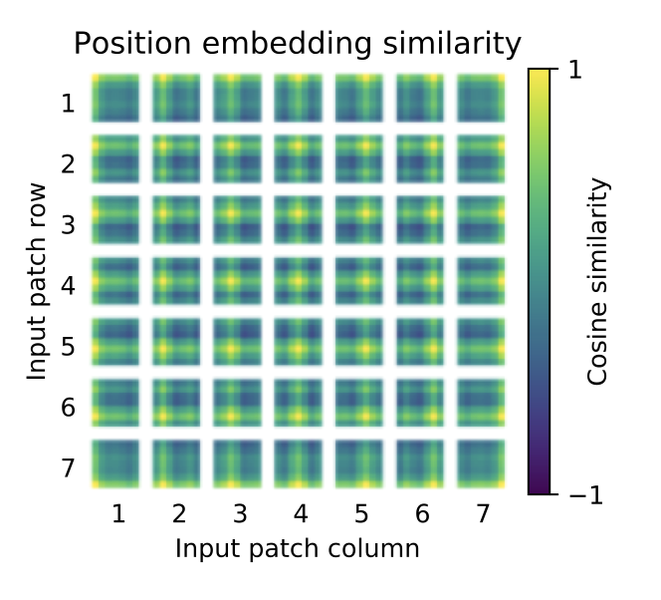  
[출처: https://arxiv.org/abs/2010.11929v2]  

Flatten 처리되어 벡터로 변형된 각 패치들은 Linear 연산을 통해 지정된 형태의 Embedding 으로 변환됩니다.

시퀀스 형태로 정렬된 임베딩 가장 앞 부분에 클래스 예측을 위한 Class token embedding을 추가해줍니다. 데이터의 Label 로부터 만들어진 이 토큰은 이미지와 함께 입력되는 클래스 정보를 담고있으며, 각기 다른 입력 데이터들을 구분하고 연관지어주는 열쇠로 작용하게 됩니다.
클래스 토큰이 포함된 패치 임베딩에 지정된 형식의 Positional embedding 을 더해주면, 원본 이미지에서 패치들이 어느 위치에 있었는지에 대한 정보도 놓치지 않고 학습 과정에서 활용할 수 있게 됩니다.

아래 링크로 들어가 마우스 커서를 이미지 위에 올려놓으면, 선택된 패치와 연관성이 높은 패치의 활성도를 시각화해놓은 자료를 관찰하실 수 있습니다. 레이어 깊이에 따라 실제 모델의 계산 결과를 관찰하는 것도 좋은 생각 포인트가 되겠죠?

- Visualization of Self-Attention Maps in Vision https://epfml.github.io/attention-cnn/  

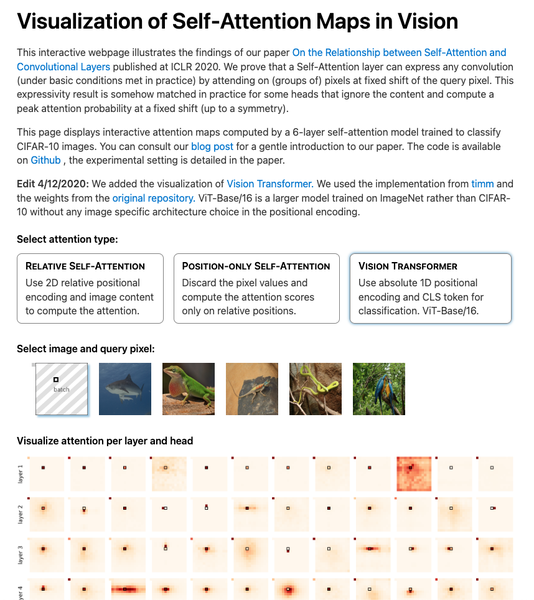  

### ViT, CV 데뷔, 성공적!
---
이렇게 만들어진 ViT 는 이미지 분류 문제 분야에 성공적으로 안착하게 됩니다. 그저 스쳐가는 단발성의 성과로 그치지 않고, 이후 ViT 를 베이스로한 다양한 파생 모델들이 연구되었으며, 현재도 정말 많은 분야의 벤치마크 자료에서 상위권을 장악하며 그 명성을 널리 알리고 있습니다.

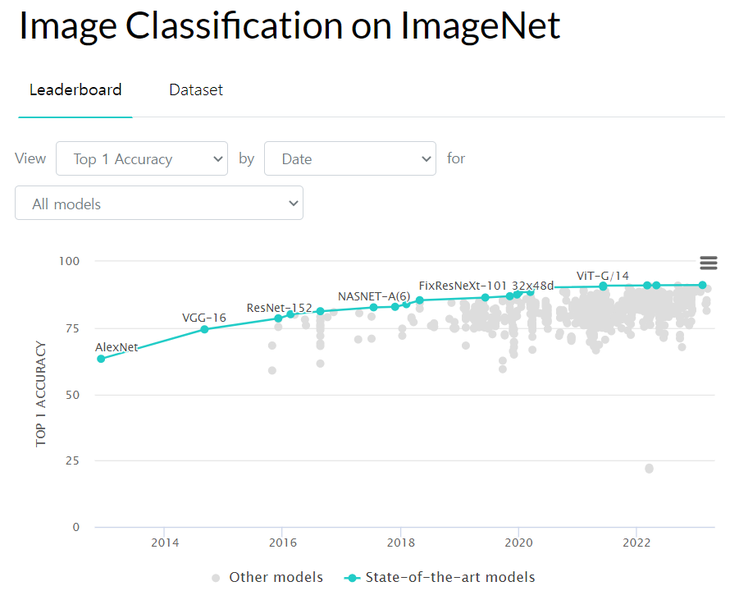  

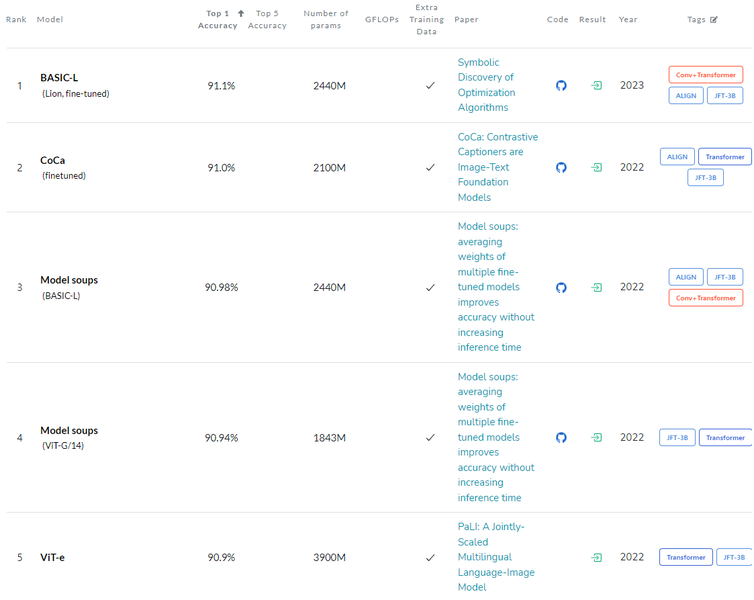  
표 오른쪽에 모델을 요약하는 Tags 에서 트랜스포머가 보이시나요?

- Papers with code - Image Classification on ImageNet https://paperswithcode.com/sota/image-classification-on-imagenet  

트랜드를 따라가고 싶다면, 위 링크로 들어가서 내가 관심있는 데이터셋 벤치마크를 직접 찾아 ViT의 이름을 확인해보는건 어떨까요?

# 25-5. ViT(4)


### ViT 의 성능이 궁금하세요?
---

컴퓨터 비전에 적용된 ViT 는 어떤 장점과 단점을 보여주고 있을까요?
또, 기존 CV 분야에서 막대한 기여를 해온 Convolution layer 기반 모델들과 비교했을때, 어떤 부분에서 차이점을 보여주고 있는걸까요?
이렇게 뛰어난 ViT에서 더 발전해나갈 부분이 있을까요?
하나씩 짚어가며 살펴봅시다!


### ViT 의 장점과 단점을 알아봅시다
---
ViT의 구성을 간략하게 요약해보자면, 이미지의 형태를 변경하는 임베딩 전처리 과정을 네트워크 앞부분에 덧붙이고, 이미지 해석을 위한 백본 네트워크로 트랜스포머를 활용한 것으로 볼 수 있습니다. 이 과정에서 입출력 데이터의 형태가 동일한 트랜스포머의 특성을 거의 동일하게 유지하였으며, 결과적으로 트랜스포머의 뛰어난 확장성을 유지할 수 있었습니다.

모듈식으로 이루어진 ViT 의 구성요소들은 내부 구조를 부분적으로 변경하고자할 때 아주 편리하며, 작업자가 설정한 문제 정의에 맞추어 자유롭게 스케일을 조정할 수 있다는 커다란 이점이 있습니다.


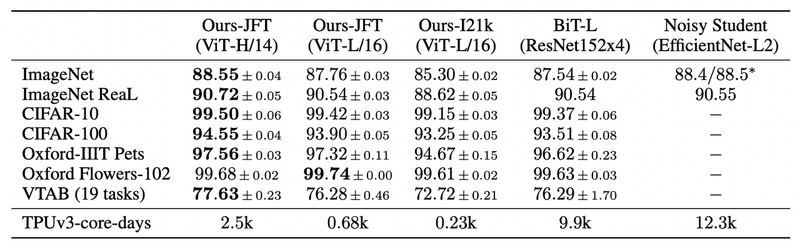  
[출처: https://arxiv.org/abs/2010.11 929]  

자연어 처리 분야에서 트랜스포머는 비교적 긴 시퀀스 입력으로 인해 발생하는 장기 의존성 문제(Long-term dependency problem)를 해결하면서, 아주 큰 규모의 데이터셋을 학습하는데 유리하다고 알려져있습니다.
이미지 분류 문제에 도전한 ViT 도, 3 억 장의 이미지와 10 억 개의 레이블이 연결된(over one billion labels for the 300M images, a single image can have multiple labels) 커다란 규모의 JFT-300M 데이터셋을 효과적으로 학습할 수 있음을 보여주었습니다.

위 표는 논문 https://arxiv.org/abs/2010.11929 의 Table 2 에 제시된 모델과 데이터셋 별 성능비교 자료입니다. 비슷한 규모로 사전학습된 Convolution 기반 네트워크들(BiT-L, Noisy Student) 과 ViT를 비교했을 때, 거의 모든 데이터셋에서 ViT가 더 우수한 성능과 빠른 학습속도를 보여줌을 확인할 수 있습니다. core-days는 하루 당 학습에 필요한 코어의 갯수를 나타내며, 현재 사용하는 연산장치의 코어 수를 core-days로 나눠주면 학습에 필요한 시간을 역으로 계산할 수 있습니다.



그렇다면 트랜스포머를 기반으로한 ViT 는 단점이 존재하지 않는 완벽한 모델이 될 수 있을까요?

CNN, ViT 등 여러 학습 알고리즘을 비교하는 특성 중 하나로, 귀납적 편향 문제 Problem of inductive bias 이라는 단어를 사용하곤 합니다.

여러 학습 알고리즘들 사이에 어떤 차이가 나타나는지 한번 검색해볼까요?

> 귀납적 편향이란 학습 알고리즘이 일반적인 상황에 적응하기 위해 사용하는 가정을 의미합니다. 이러한 가정은 모델이 학습하는 데이터의 특성에 따라 선택됩니다. 예를 들어, RNN은 시간적인 순서가 중요하다는 가정을 가지고 있습니다 CNN은 이미지의 지역적인 특징이 중요하다는 가정을 가지고 있습니다. ViT는 이미지의 전역적인 관계가 중요하다는 가정을 가지고 있습니다.


컴퓨터 비전 분야의 뿌리가 되던 컨볼루션 레이어 기반의 모델보다 트랜스포머 기반의 모델이 귀납적 편향이 적다고 흔히 표현하곤 합니다.

> This seemingly discouraging outcome may be expected: Transformers lack some of the inductive biases inherent to CNNs, such as translation equivariance and locality, and therefore do not generalize well when trained on insufficient amounts of data. (Dosovitskiy et al., 2021) 이것은 겉으로 보기에 낙담할만한 결과라고 받아들여질 수 있습니다: 트랜스포머는 CNN 에 비해 병진 동등성(Translation equivariance) 및 지역성(Locality) 과 같은 CNN 고유의 귀납적 편향이 부족하여, 데이터 양이 충분하지 않은 상태에서 훈련하면 일반 일반화가 잘 이루어지지 않습니다.

서로 다른 방법론의 귀납적 편향을 비교하는 시각은, 수집 가능한 데이터의 종류나 형식에 따라 어떤 범위의 방식(모델)을 선택해야 성공적으로 문제를 해결할 수 있는가? 라는 물음에 대한 패러다임의 변화를 보여줍니다.


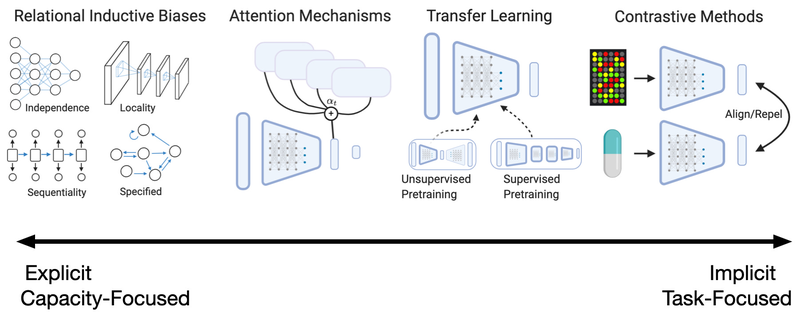  
[출처: https://mlops.substack.com/p/mlopsrelational-inductive-biases]  

위 그림에서 알 수 있듯이, 기존의 CNN 모델들은 지역적인 특성을 검출하는 기능을 바탕으로 명시적이고 직관적인 Explicit 특성을 가진 반면, ViT 는 이미지의 전역적인 관계성을 파악함으로써 내재적인 메시지나 추상적이고 감정적인 의미 등 Implicit 한 특성이 두드러진다고 볼 수 있습니다. 엄밀히 말해 귀납적 편향은 단점이라기보다 각 알고리즘의 특성이라고 표현해야겠지만, 우리가 적용하고자 하는 문제의 정의에 맞춰 충분히 깊이 고민해봐야할 점인 것은 분명합니다.




Q. 컴퓨터 비전 분야에서 neural network 를 활용할 때, explicit 과 implicit한 표현을 구분지을 수 있는 예시를 적어봅시다
Preprocessing 단계에서 명시적 특징 추출 → Neural Network로 암시적 학습  

explicit 한 특성의 예시로는 이미지의 색상, 질감, 모양 등이 있습니다. 이러한 표현들은 이미지에서 명확하게 관찰되거나 측정할 수 있으며, 신경망이 이미지를 분류하거나 인식하는 데 사용됩니다.
반면에 implicit 한 특성의 예시로는 이미지의 내재적인 의미나 이미지가 전달하고자 하는 메시지와 같은 추상적인 개념이 있습니다. 이러한 특성들은 직접적으로 관찰되거나 측정하기 어렵지만, 신경망이 이미지를 이해하고 해석하는 데 중요한 역할을 합니다. 예를 들어, 신경망이 이미지의 감정적인 분위기나 이미지가 전달하는 메시지를 파악하여 이미지를 분류하거나 인식하는 경우가 있습니다.



### Let's Swin! 앞으로 한 발짝 더
---
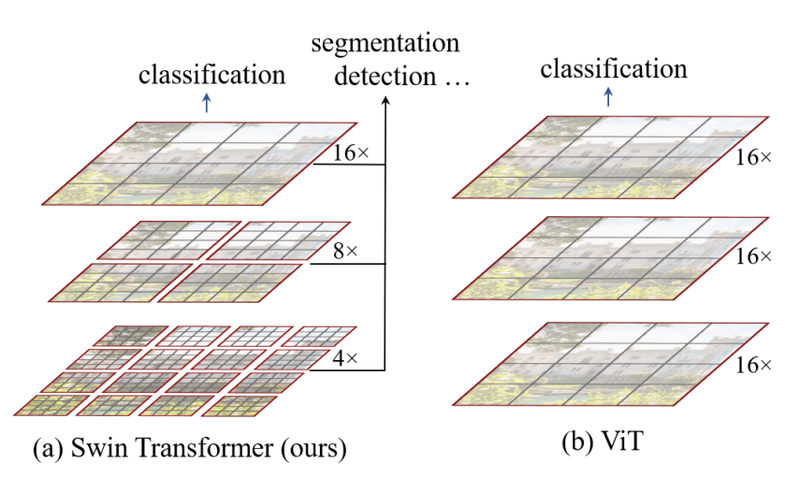  
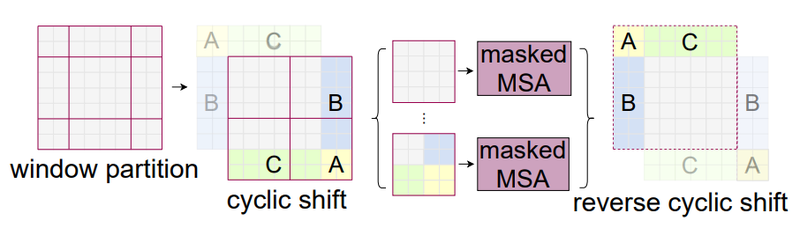  
[출처: https://arxiv.org/abs/2103.14030]  

2021 년 발표된 ViT는 이후 Foundation 수준의 Backbone 으로서 인정받기 시작하면서 다양한 방식으로 널리 활용되기 시작합니다. 그 중에서도 뛰어난 성능 향상을 보이며 주목받은 모델로 Swin transformer가 있습니다. Shifted windows https://arxiv.org/abs/2103.14030v2 의 약어로도 알려진 Swin transformer는, 주로 Implicit 한 특성을 지닌 ViT 에서 출발해 더 다양한 Explicit 특성을 가미하기 위해 여러 장치들을 적용하였습니다.

Swin trasnformer의 저자는 CV 분야에서 트랜스포머를 적용하기 어렵게 만드는 두 가지 차이점으로, 1) 이미지 내에서 시각적 대상의 크기가 다양하게 변한다는 점과 2) 이미지를 효과적으로 분석하기 위해 높은 픽셀 해상도가 필요하다는 점을 강조하였습니다. 이를 해결하기위해 feature pyramid network 를 연상케하는 계층적(hierarchical)인 window 구조를 적용하였으며, 각 윈도우의 연관성을 다양하게 유지하기 위해 윈도우를 변형하여 모델에 입력하는 cyclic shift방식을 추가하였습니다.

각 장치들이 어떤 방식으로 작동하는지 상세한 과정들에 대해 살펴보진 않겠지만, 이전 CV 분야에 있었던 굵직한 모델들이 발전해온 흐름과 ViT 이후 모델들의 변화를 비교하여 연결해본다면, 컴퓨터 비전 분야에서 해결하고자 하는 주요한 쟁점들을 떠올리는데 효과적인 공부가 될 수 있겠네요!

# 25-6. Diffusion model


### 이런건 어떻게 만드는거지?
---
> 🎥 아주 흥미로운 영상이 또 하나 있네요!

https://youtu.be/iE39q-IKOzA


아이디어가 정말 참신하지 않나요😆 영상을 보고 또 어떤 생각이 드셨나요?
이런 것들은 도대체 어떻게 만드는거지? 마구 궁금하실 것 같아요!

사람이 일일이 조정할 필요 없이, 원하는 기준 안에서 세세한 부분을 그럴듯하게 채워주는 생성 모델 Generative model 에 대한 관심이 아주 뜨거워지고 있어요. 이러한 생성 모델을 다양하게 활용하면, 여태까지 현실에 존재하지 않던 진짜 창의적인 데이터 결과물을 만들어낼 수 있답니다.

나만의 취향이 담긴 세상에 없던 이미지를 만드는 방법, 지금부터 함께 알아볼까요!?



### 이미지 생성 모델의 분류
---
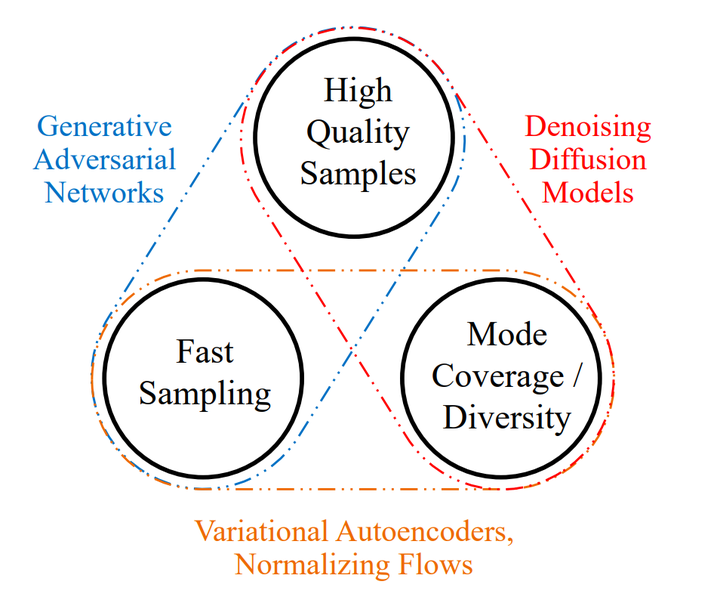  
[출처: https://arxiv.org/abs/2112.07804]  

컴퓨터 비전 분야에서 이미지를 활용한 생성 모델을 구성하는 방식은, 위 그림처럼 크게 세 분야로 나눠 볼 수 있습니다.

> Generative Adversarial Network (GAN)
> Variational AutoEncoder (VAE)
> Diffusion model

위 방법론들이 탄생하게된 계기나, 아이디어가 발전된 시기에서 차이가 나지만,
각 모델들이 보여주는 다양한 퍼포먼스 특징들은 영역 별로 꽤나 분명하게 나뉘어있기도 합니다.
동시에, 아래 그림에서 같이 모델들이 구조적으로 서로 공유하고 있는 컨셉도 엿볼 수 있습니다.

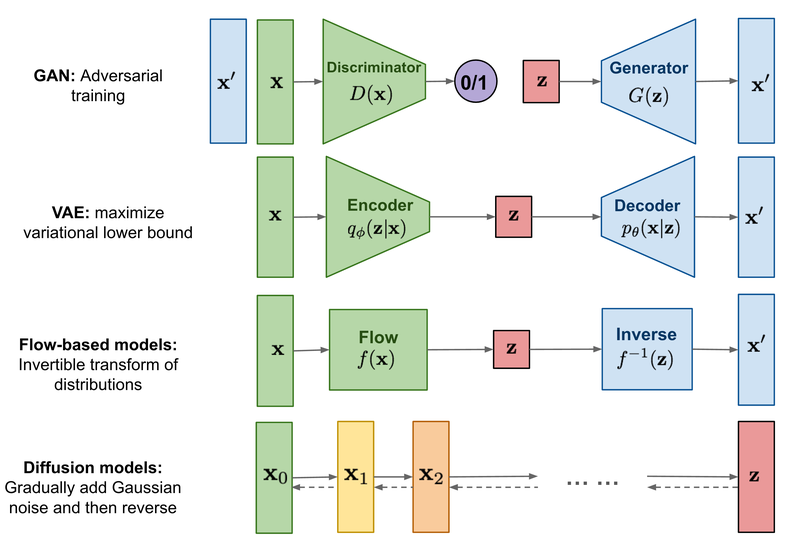  
[출처: https://lilianweng.github.io/posts/2021-07-11-diffusion-models/]  


### Q. 위 그림에서 데이터의 흐름을 관찰해보고, 각 모델 구조에 나타나는 공통점과 차이점에 대해 적어봅시다
- GAN: 적대적 학습을 통해 실사와 유사한 데이터를 생성
- VAE: Encoder-Decoder 구조로 잠재 변수 분포를 학습해 데이터 생성
- Flow-based Models: 가역적 변환을 통해 정확한 분포 학습 및 데이터 재생성
- Diffusion Models: 노이즈 추가 및 제거 과정을 통해 고품질 샘플 생성


모든 모델은 중앙의 잠재 변수 z 를 중심으로 대칭적인 구조를 가지고 있습니다.
GAN 은 생성 과정에서 디테일한 부분에서 가짜일 확률이 높다??
VAE 는 작은 크기의 데이터에서 큰 데이터 생성 -> 디테일한 부분이 모호하게 표현??
Flow-based model 과 Diffusion model 은 작은 단위체가 연속적으로 이어지는 구조가 보입니다.


모든 생성 모델의 종류를 낱낱이 살펴보기엔 너무나 많은 시간과 노력이 필요할 것 같기에,
이번 노드에서는 최근 트렌드를 주도하는 핫하고도 핫한 주인공 디퓨전 모델 에 집중해서 살펴볼 예정입니다.



### Learning by Doing !
---
본격적인 내용으로 들어가기 전 준비운동으로, 디퓨전 모델을 활용해 아기자기한 그림을 한번 그려볼까요?
링크 의 사이트로 들어가보면, 직접 내가 손으로 그린 컨디션 정보와 그림에 대한 텍스트 설명으로 이루어진 프롬프트를 조합해
손쉽게 새로운 그림을 만들어 볼 수 있습니다.

저도 한번 솜씨를 부려봤는데 어떻게 보이시나요?😁

- 🖌️ Scribble SDXL https://huggingface.co/spaces/linoyts/scribble-sdxl  


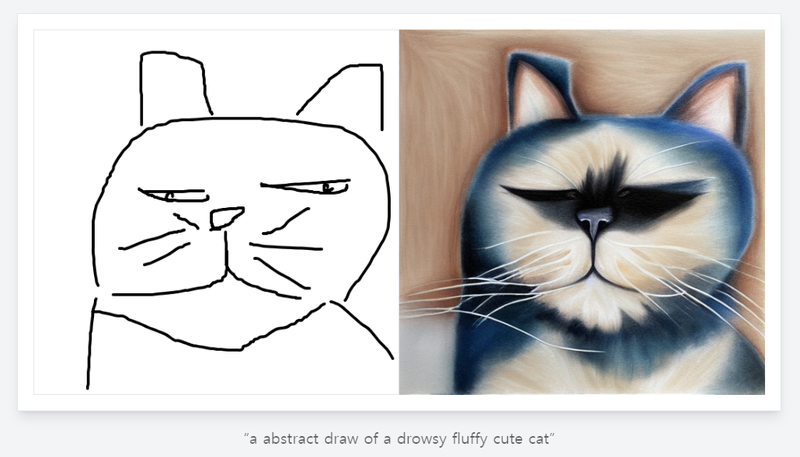  
[출처 : https://scribblediffusion.com/scribbles/ufbdowlj3ne53eyd6s6tote2vy]  

디퓨전 모델을 활용하면, 동일한 구조의 모델을 통해서도 다양한 형태의 작업을 수행할 수 있습니다.
아래는 디퓨전 기법에 큰 발자국을 남기고 있는 Stable Diffusion 모델을 활용하여 만들어진 ControlNet 이라는 모델이 만들어낸 결과물입니다.
(논문을 참고하시면 더 많은 자료를 확인하실 수도 있습니다) https://arxiv.org/abs/2302.05543  


> 상세한 부분까지 꼼꼼하게 관찰해보세요 🔎

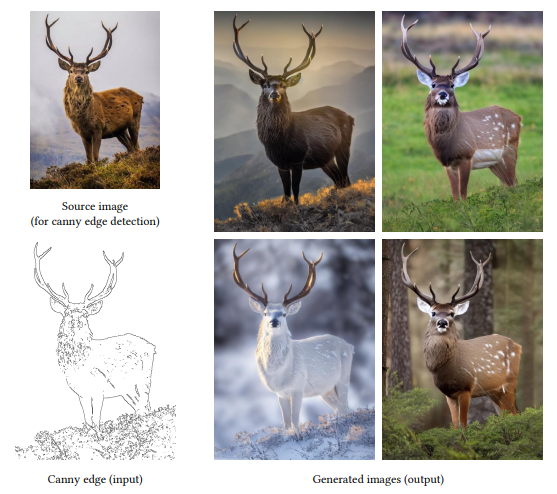
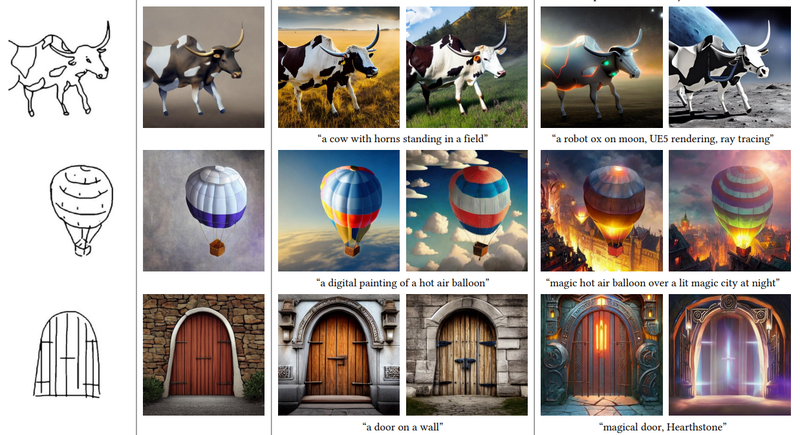
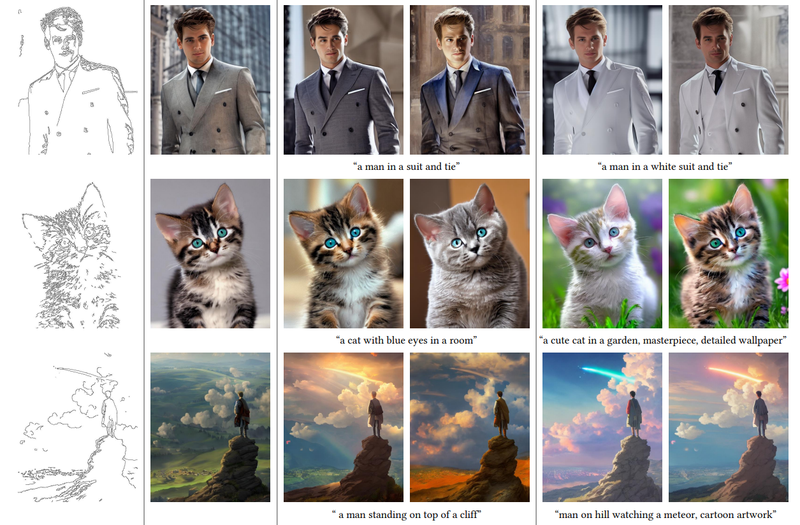
[출처: https://arxiv.org/abs/2302.05543]  

물체의 자세와 같이 동일한 조건에서 배경이나 물체의 특징 등 상세한 부분들을 아주 자연스럽게 채워주는 것이 보이네요.
어떤 컨디션과 프롬프트를 조합하느냐에 따라 폭넓은 분야에 적용하기 아주 좋아보입니다.
ControlNet 을 활용하면 아래와 같이 여러 종류의 작업들을 수행할 수 있다고 알려져있습니다.

> - Unconditional Image Generation
> - Text-Guided Image Generation : Prompt 
> - Text-Guided Image-to-Image Translation 
> - Text-Guided Image-Inpainting : Mask 
> - Text-Guided Depth-to-Image Translation : Depth map

이 중에서 Text-Guided Image-Inpainting 생성 결과를 자세하게 살펴볼까요?
Inpainting 은 마스크 데이터를 이용하여 편집하고 싶은 물체의 범위를 특정해주고, 이미지 안에서 다른 요소들과 자연스럽게 어울리도록 변경해주는 작업입니다.
텍스트 프롬프트에 알맞게 물체를 재구성하는 것 뿐만 아니라, 물체로 가려지지 않는 부분을 원래 배경 요소에 맞추어 만들어줘야 하는 복합적인 작업이죠.

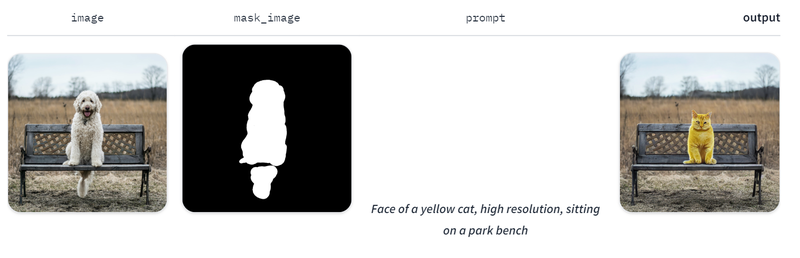  
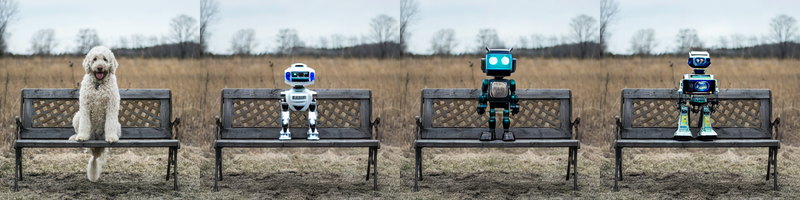  
[출처 : https://huggingface.co/docs/diffusers/quicktour]


#### Q. 위 그림 생성 결과물에서 관찰할 수 있는 부분을 짚어보고 예시정답과 비교해봅시다.

짜잔! 🤩 벤치에 얌전하게 앉아있던 귀여운 개가 애니메이션에서 뛰쳐나온 듯한 로봇들로 변신했군요!
입력 데이터에서 개의 몸체가 가리고 있던 벤치 등받이와 꼬리로 가려졌던 풀밭 부분을 원래 형태와 유사하도록 만들어준 부분이 눈에 띄네요.
더욱 먼 배경에서 갈대밭이나 언덕 부분이 어떻게 재구성되고 있는지 관찰해보는건 어떨까요?


어떠신가요? 점점 흥미로운 내용들이 속속 추가되고 있어요😆  
한층 더 깊이 뛰어들어서 디퓨전 과정이 과연 무엇인지 자세히 알아보고,  
Stable Diffusion 모델이 어떤 요소들로 구성되어있는지 이해해봅시다!  


# 25-7. Diffusion model(2)


### 멀쩡한 데이터에 노이즈를 섞어 보았는데요?!
---

딥러닝 생성분야에서 최근에 주목받고있는 디퓨전 모델 은, 기존의 강자였던 GAN 과 비교했을 때 다음과 같은 몇 가지 장점을 보입니다.

> 1. 디퓨전 모델은 GAN 보다 더 안정적이고 빠르게 학습됩니다.
> 2. 디퓨전 모델은 GAN 보다 더 사실적이고 고품질의 이미지를 생성할 수 있습니다.
> 3. 디퓨전 모델은 다양한 특성이 함께 담겨있는 이미지를 생성할 수 있습니다.  

디퓨전 모델은 완전한 노이즈로부터 시작하여 이를 점차적으로 제거함으로써 새로운 이미지를 생성합니다.
이미지 생성을 위해 디퓨전 모델이 학습하는 과정은 크게 diffusion 과 denoising process, 두 부분으로 나누어 볼 수 있습니다.



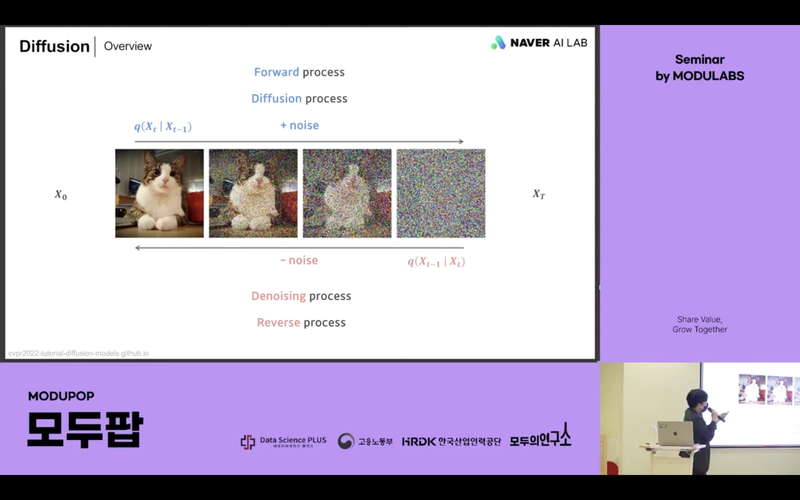  
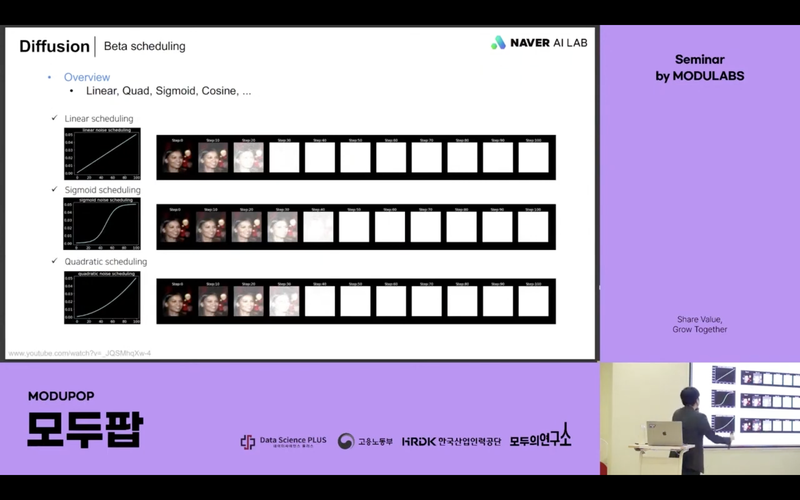  
[출처: https://www.youtube.com/watch?v=jaPPALsUZo8]  

먼저, forward process 라고도 불리는 diffusion process 입니다. 디퓨전 과정은 원본 이미지와 노이즈를 활용해 학습에 사용될 데이터를 만드는 과정입니다.

일정한 간격의 스텝 t 에 따라 원본 이미지에서부터 점차적으로 노이즈를 더해 섞어주면서, 학습하려는 이미지와 노이즈 사이에 다수의 중간 단계를 만들어줍니다.
일반적으로 가우시안 분포를 활용하여 노이즈를 생성할 수 있고, 동일한 과정을 다수 반복하면서 점진적으로 이미지를 변형(large number of small perturbation) 해가는 과정 이라고 이야기할 수 있습니다.
중간 단계의 스텝 수는 사용자가 직접 조정할 수 있는 하이퍼파라미터이며, 그림에서도 관찰할 수 있듯이 여러 가지 diffusion scheduling 기법을 활용하면 원본 이미지의 특성이 어느 스텝 시점까지 유지될 수 있을지도 조정이 가능합니다.
디퓨전 과정은 하나의 데이터와 단일 프로세스를 이용하여, 동일한 내재적 특성을 공유하는 서로 다른 입력 데이터(latent variables)를 생산할 수 있다는 특징을 가집니다.


---
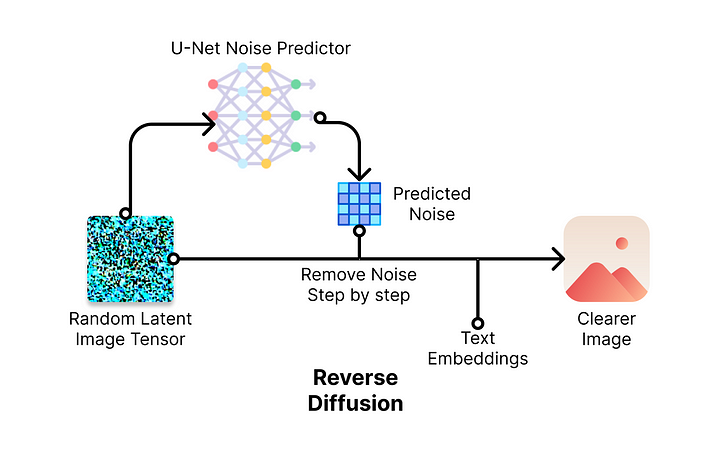  
[출처: https://bootcamp.uxdesign.cc/how-stable-diffusion-works-explained-for-non-technical-people-be6aa674fa1d]  

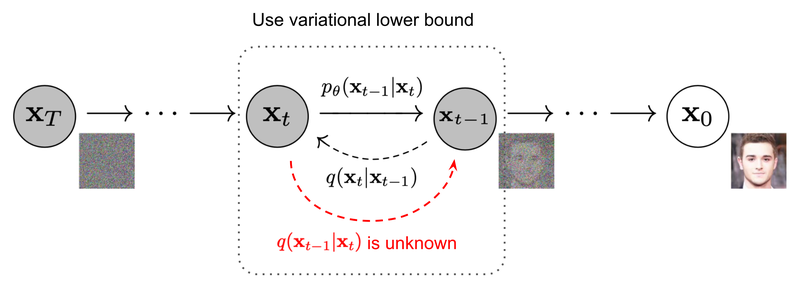  
[출처: https://arxiv.org/abs/2006.11239]  

다음은 backward process 또는 denoising process 부분입니다.
노이즈 제거 모델은 입력 데이터안에서 특정 분포의 노이즈를 제거하며 점차 더 선명한 이미지를 출력하는 작업을 반복하게 됩니다.

위 그림과 같이 앞서 디퓨전 과정을 통해 제작한 t 와 t-1 시점의 노이즈가 포함되어 있는 이미지 데이터를 준비합니다. 다음으로 t 스텝의 이미지를 입력받아 노이즈의 분포를 예측하고 제거할 noise predictor 를 설정해줍니다. 이때 모델은 원본 이미지에 연결되어있던 text embedding 을 참고하여, 노이즈를 제거하고 난 후 출력 이미지에 남겨둘 형상 정보들을 추정할 수 있게 됩니다.
이러한 단일 과정을 거치면서 t-1 스텝의 이미지는 공통된 내재적 특성을 유지할 수 있고, 이미지 안에서 표현되어야할 세부 정보들을 발전시켜 나갈 수 있게 됩니다. t 와 t-1 시점의 입력 이미지들은 스텝 수 설정에 따라 충분히 학습을 거쳐 예측이 가능할 만큼 작은 차이들을 지니게 됩니다.
전체 학습 과정을 반복하고나면 디노이징 모델이 랜덤한 노이즈부터 사전 조건에 맞춰 새로운 형태의 선명한 이미지들을 완성할 수 있겠죠!


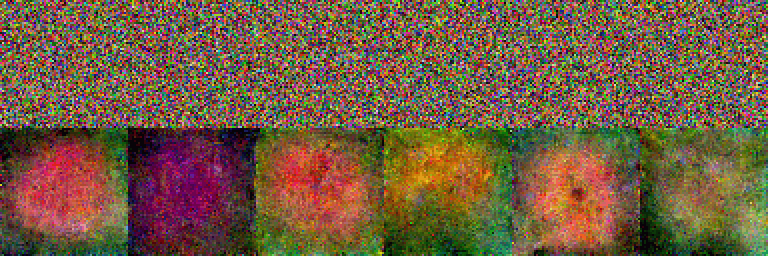  
(출처:https://keras.io/examples/generative/ddim/)  

그림의 윗줄은 디퓨전 과정을 통해 만들어진 노이즈를 포함한 이미지 데이터이고,
아랫줄은 디노이징 과정을 거쳐 추정한 임베딩을 기준으로 생성된 출력 이미지 결과를 보여줍니다.


디퓨전 모델의 주요 목적은 Loss 함수 설정에서 엿볼 수 있습니다.
아주 다양한 종류의 디퓨전 모델이 있지만, 기존의 생성모델들과 차이점은 역시 노이즈 제거 과정이 차지하는 역할이 크다는 점입니다.
최종적으로 생성된 이미지와의 차이도 중요하지만, 디노이징 과정에서 우리가 타겟으로 삼은 데이터 분포를 잘 따라가고 있는지 확인하는 과정이 중요해보입니다.

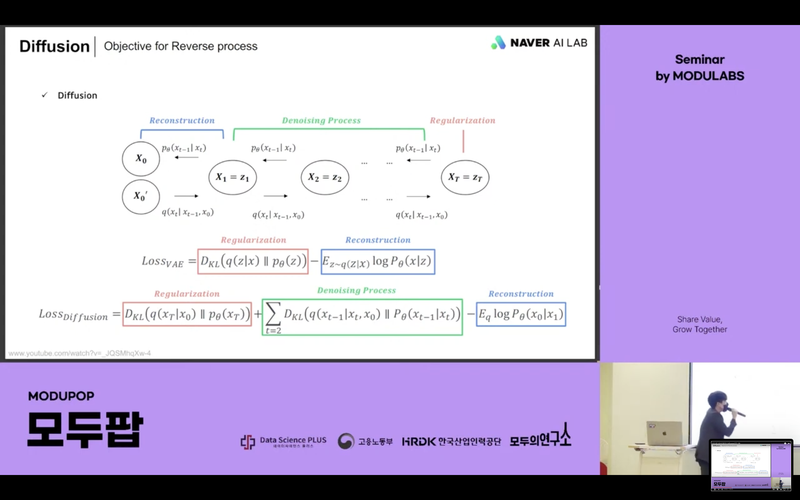
[[출처: https://www.youtube.com/watch?v=jaPPALsUZo8]]

# 25-8. Diffusion model(3)


### Latent, 그 오묘한 세계로!
---

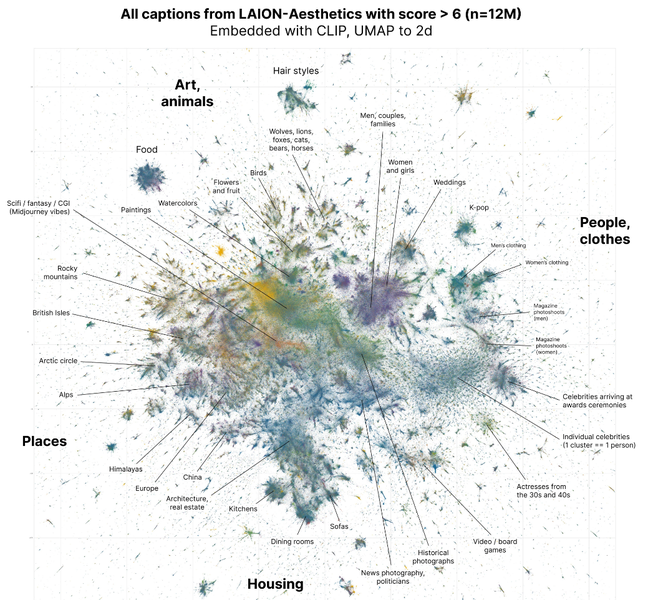  
[출처 : https://twitter.com/clured/status/1565399157606580224]  

> 마치 새로운 세계로 진입하는 거대한 지도 같아 보이지 않나요?🤩

위 그림은 SD 모델에서 활용되는 text encoder 인 CLIPText 내부의 Latent space 를 좀더 낮은 차원으로 변형하여 시각화한 모습입니다.
다양하게 퍼져있는 데이터들 사이에서도 특정 구역 안에 커다랗게 또는 옹기종기 모인 데이터들의 군집이 보이는것만 같네요!
각각의 영역들에 People, Places, Art 등 큰 규모의 범주라거나, Paintings, Hymalayas, Magazine photoshoots 등 아주 세부적인 범주까지 이름 붙여놓은 것이 눈에 띕니다.
내재적 표현 Latent representation 을 활용하면 데이터가 담고 있는 특성들의 유사성을 검토할 수 있고 데이터 사이의 연관성을 더욱 간결하게 표현할 수 있을 것 같습니다.

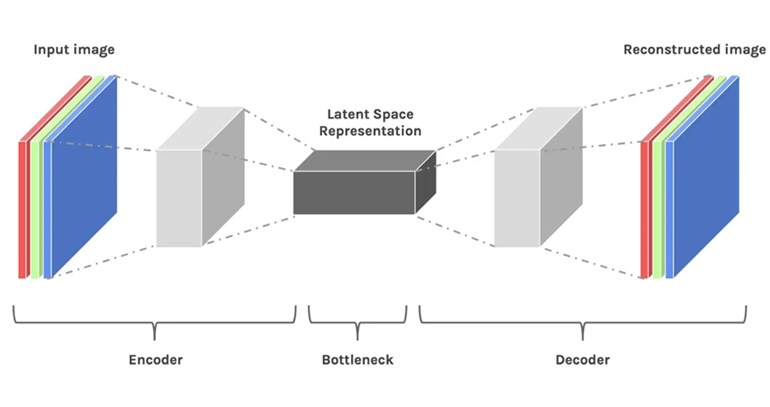


#### Q. 딥러닝 모델 안에서 내재적 표현을 찾아 활용하려면 어느 부분을 탐색해야 발견할 수 있을까요?
가중치를 시각화하여 모델이 데이터를 어떻게 인식하고 있는지 이해합니다.  
활성화 함수를 분석하여 모델이 내재적 표현을 생성하는 방법을 이해합니다.  
가중치는 딥러닝 모델이 데이터에서 학습한 내재적 표현을 나타냅니다. 가중치를 분석하면 모델이 데이터를 어떻게 인식하고 있는지 이해할 수 있습니다.  
활성화 함수는 딥러닝 모델의 층에서 계산되는 함수입니다. 활성화 함수는 가중치를 통해 들어오는 정보를 처리하고 내재적 표현을 생성합니다.  


위의 예시 답안처럼 우리는 모델이 데이터를 어떻게 해석하고 있는지 관찰하면서 내재적 표현을 확인할 수 있습니다.
하지만 너무 많은 특성을 동시에 담고있는 의미적 표현은, 관찰자가 데이터들을 직관적으로 인식하기 어렵게 만들 수도 있습니다.
이를 위해 우리는 데이터의 차원을 조금 낮추어, 데이터를 구별하는데 주효한 특성들만 남도록 모델의 구조를 설정할 수 있습니다.
또한 밀집 벡터 형식의 임베딩을 활용하면 연속적인 차원안에 우리가 원하는 데이터들을 동시에 나열하기에 용이합니다.


알쏭달쏭한 내재적 표현, 어떻게 활용하면 좋을까요?  

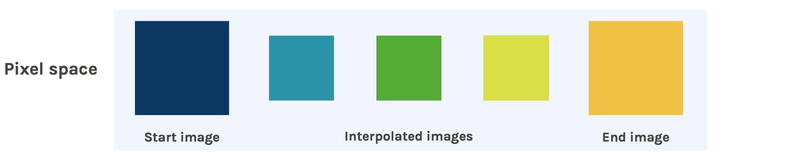  
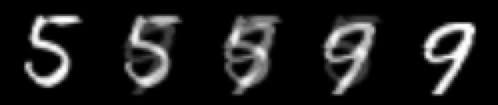  

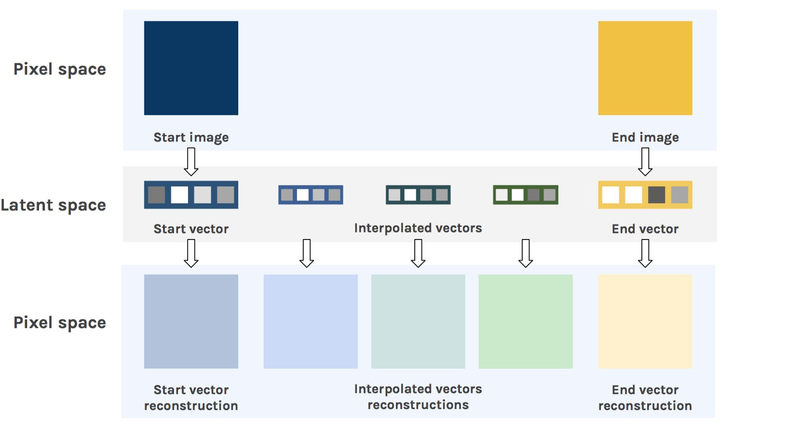  
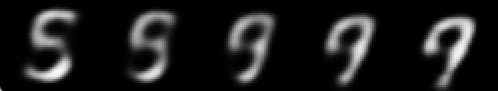  

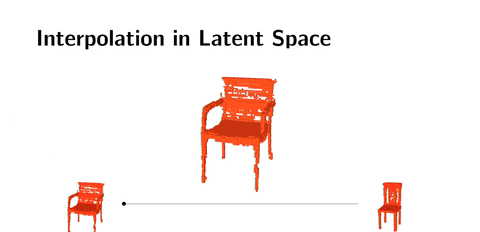  
[출처: https://hackernoon.com/latent-space-visualization-deep-learning-bits-2-bd09a46920df]  

위의 그림들은, 두 데이터의 간 차이를 선형적으로 채워나가는 상황에서 각각 이미지 공간과 내재 공간을 활용하는 방법을 비교하고 있습니다.

이미지 공간에서 선형적으로 보간을 수행할 때는 두 가지의 형상이 서로 겹쳐진 채로 동시에 존재하며 보이지만,
내재 벡터를 활용할 경우에 '손글씨로 적은 숫자' 라는 이미지적 특성을 유지한 채로 더 합리적이고 분명한 결과가 출력되는 것을 볼 수 있습니다(다만, 내재 벡터로부터 Reconstruction을 수행할 모델을 학습해야하는 추가 과정이 생략되었습니다).
또한 벡터 표현들을 활용할 경우, 여러 특성들을 수치적으로 연산하여 간접적으로 조정할 수도 있겠군요.

이러한 작용들은 훨씬 높은 차원의 표현(이미지에서의 형상 정보 등)을 더 자연스럽게 변형시키기 위해, 우리가 어떤 표현과 방법으로 접근해야 하는 지에 대해 중요한 영감을 줍니다.



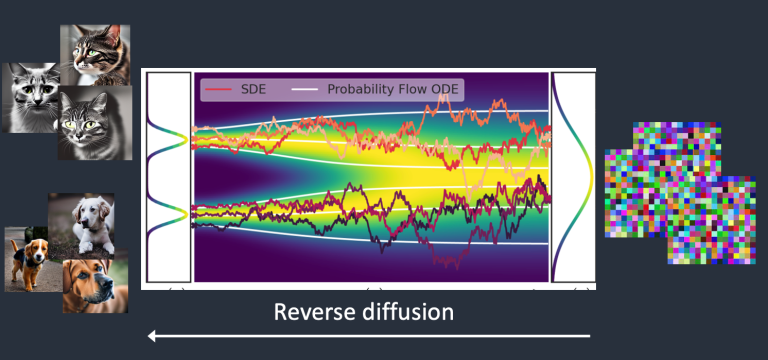  

여기까지 내재적 표현에 대해 이해한 상태에서, 우리가 다뤄야할 모델 이야기로 돌아가 볼까요!

초기 디퓨전 모델은 고해상도의 이미지 데이터를 다루면서 동시에 아주 많은 스텝으로 나누어진 데이터를 활용하다 보니, 줄곧 학습 시간 등 연산에 필요한 자원량이 실용적이지 못하다는 점을 지적받아 왔습니다.
이렇듯 과도한 리소스가 필요한 디퓨전 모델의 접근성을 향상시키기 위해, representational space 를 활용한 Latent Diffusion Model(LDM) 이 제시되었고, 곧 엄청난 주목을 받기 시작합니다.

# 25-9. Diffusion model(4)


### 두둥 그리고 Stable Diffusion!
---
> 🎨 Stable diffusion 모델의 핵심인 디코더 구조입니다.

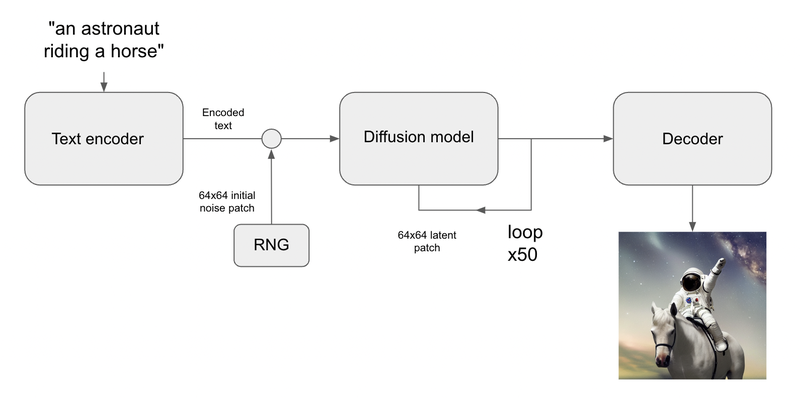  
[출처: https://keras.io/examples/generative/random_walks_with_stable_diffusion]  


#### Q. Stable diffusion 은 어떤 종류의 데이터를 입력으로 활용할까요? 위 그림을 통해 확인해봅시다.

원본 이미지는 임베딩 형태로 입력됩니다. 텍스트 형태의 그림 설명은 text encoder 를 거쳐 활용됩니다. 노이즈로부터 만들어진 patch 도 보이는군요.


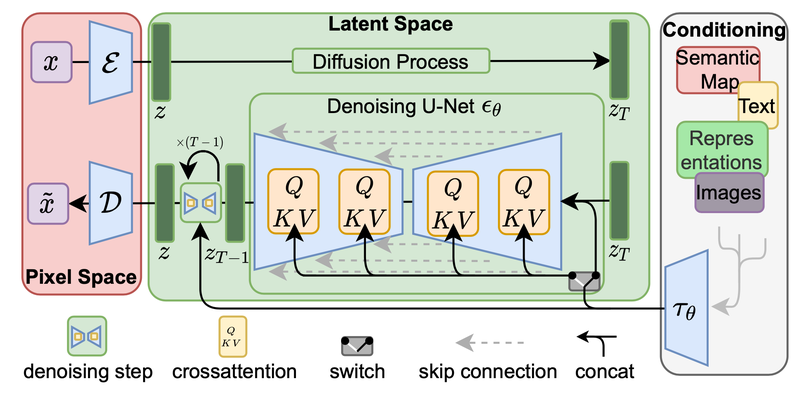  
[출처: https://arxiv.org/abs/2112.10752]  

Stable diffusion 은 2022년 OpenAI 에서 발표된 딥 러닝 기반의 이미지 생성 모델입니다.
SD 모델은 diffusion & denoising process를 사용함으로써 이미지의 세부 사항을 잘 보존하면서도 다양한 스타일의 이미지를 생성할 수 있습니다.

SD 모델은 잠재 공간을 적극적으로 활용하면서 다양한 장점을 가지게 되었습니다.
잠재 공간을 통해 이미지의 고유한 특징을 효율적으로 저장할 수 있게 되었으며, 생성 과정에서 저장된 정보를 불러오기 위해 필요한 연산 비용을 획기적으로 축소시켰습니다.

Stable diffusion 은 Autoencoder, Noise predictor 를 포함하는 LDM, 제거할 노이즈의 분포를 예측하는 Unet 구조와 ViT,
텍스트와 이미지 임베딩을 구현하는 CLIPText, 샘플링(데이터 생성)을 위한 DDPM 혹은 DDIM 등 여러 구성요소가 조합된 시스템입니다.
SD 는 하나의 모델이 아니기때문에, 활용하고자하는 데이터의 종류와 특성에 따라 conditioning 데이터를 다양하게 구성할 수 있습니다.


#### Q. 위 도식을 따라가면서 Stable diffusion 이 작동하는 방식에 대해 직접 적어봅시다.
1단계: Pixel Space → Latent Space (인코딩 단계)  
2단계: Latent Space에서 Diffusion Process  
3단계: Latent Space → Pixel Space (디코딩 단계)
Stable Diffusion은 Pixel Space → Latent Space → Pixel Space의 과정을 통해 작동하며, 텍스트 프롬프트 및 기타 조건부 입력을 활용해 고품질의 이미지를 생성합니다. 핵심 기술로는 Diffusion Process, Denoising U-Net, Cross-Attention 등이 사용됩니다.


A. autoencoder 로 입력된 pixel Image 를 latent variable(z) 로 압축합니다.  
→ 저차원으로 압축된 latent space 수준에서 noise 를 첨가하는 diffusion process 수행합니다.  
→ CLIP 을 이용하여 image 와 text 를 같은 embedding 으로 결합합니다.  
→ 저차원의 latent variable 을 이용하여 빠르게 denoising diffusion 과정을 수행하면서 일정 수준까지 노이즈를 제거합니다.  
→ 최종적으로 예측한 latent variable 을 autoencoder 의 디코더로 재건하여 원본 해상도의 pixel image 로 다시 복원합니다.  


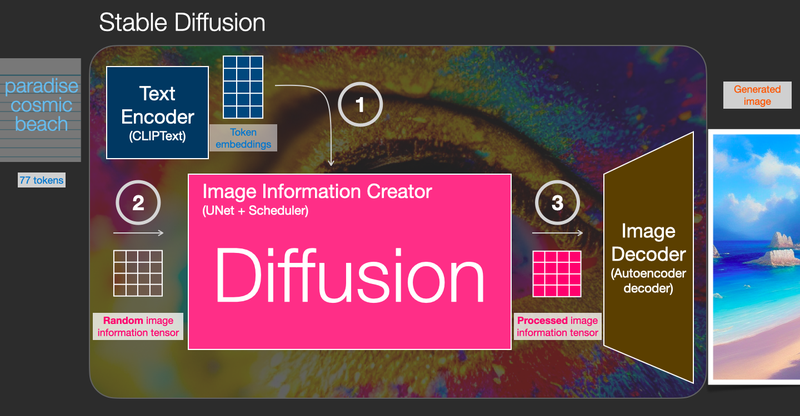  
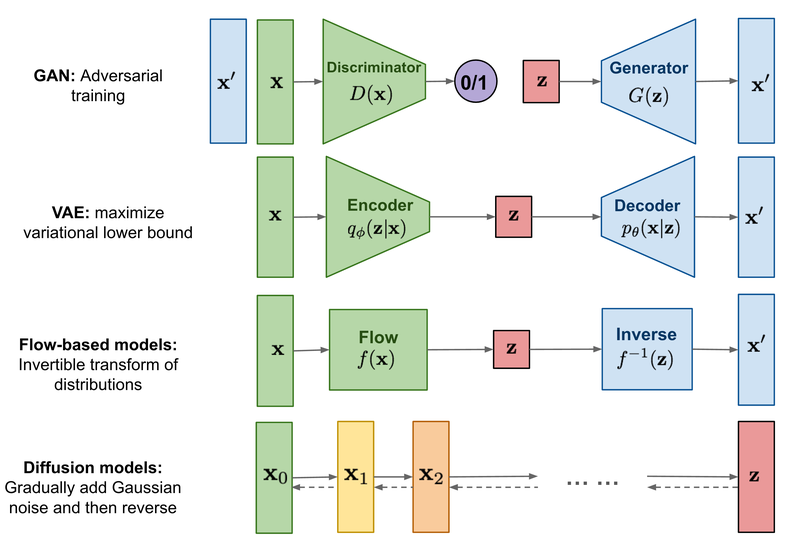  

> 🤔 Stable diffusion 내부에서 어떤 모델 구조들이 겹쳐보이시나요?  

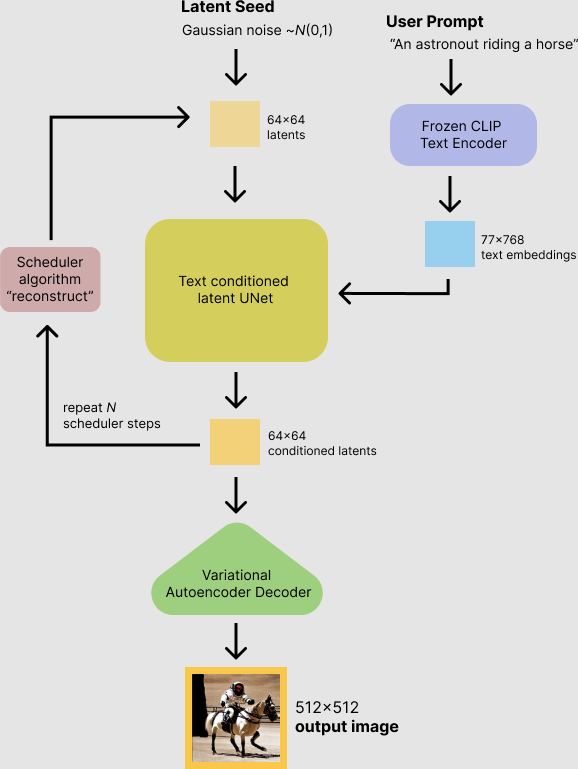  
[출처: https://huggingface.co/blog/stable_diffusion]  

SD 모델은 학습과정에서 Image, text 와 noise 를 입력받아, 노이즈를 단계적으로 제거하면서 이미지를 복원하는 과정을 배우게 되고,
추론과정에서는 입력 이미지 없이도, text 등의 조건과 noise 만으로 새로운 Image 를 생성하는 작업을 수행합니다.
___

#### Reference
- The Illustrated Stable Diffusion https://jalammar.github.io/illustrated-stable-diffusion/
- How does Stable Diffusion work? https://stable-diffusion-art.com/how-stable-diffusion-work/
- Denoising Diffusion Probabilistic Model - Keras tutorial https://keras.io/examples/generative/ddpm/
- Denoising Diffusion Implicit Models - Keras tutorial https://keras.io/examples/generative/ddim/  
  
